In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Load Data Set

In [31]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Separate X and Y variables

In [33]:
X=df.drop(columns=['math score'],axis=1)

In [34]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
Y = df['math score']

In [36]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Find unique values in X

In [37]:
print("Categorical Variables in Gender:",df['gender'].unique())
print("Categorical Variables in race/ethnicity:",df['race/ethnicity'].unique())
print("Categorical Variables in parental level of education	:",df['parental level of education'].unique())
print("Categorical Variables in lunch:",df['lunch'].unique())
print("Categorical Variables in test preparation course:",df['test preparation course'].unique())

Categorical Variables in Gender: ['female' 'male']
Categorical Variables in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical Variables in parental level of education	: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical Variables in lunch: ['standard' 'free/reduced']
Categorical Variables in test preparation course: ['none' 'completed']


#### Find Numerical Variables and Categorical Variables

In [38]:
numerical_variables = X.select_dtypes(include='int64').columns
categorical_variables = X.select_dtypes(include='object').columns

In [39]:
numerical_variables

Index(['reading score', 'writing score'], dtype='object')

In [40]:
categorical_variables

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [41]:
preprocessing = ColumnTransformer([
    ('numerical',StandardScaler(),numerical_variables),
    ('categorical',OneHotEncoder(),categorical_variables)
])

In [42]:
preprocessing

ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object')),
                                ('categorical', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])

In [43]:
X = preprocessing.fit_transform(X)

In [44]:
X.shape

(1000, 19)

#### Seperate dataset in to train and test split

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(800, 19)

In [47]:
X_test.shape

(200, 19)

In [48]:
X_test.shape

(200, 19)

In [49]:
Y_test.shape

(200,)

In [50]:
Y_train.shape

(800,)

In [51]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square_score = r2_score(true,predicted)
    return mae,rmse,r2_square_score

In [52]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'k-Neigbor Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGB Regressor':XGBRegressor(),
    'Cat Boost Regressor':CatBoostRegressor(verbose=False),
    'Ada Boost Regressor':AdaBoostRegressor()
}

In [53]:
type(models)

dict

In [54]:
type(list(models))

list

In [55]:
range(len(list(models)))

range(0, 9)

In [56]:
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)
    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and test dataset
    model_train_mae,model_train_rmse,model_train_r2_score = evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2_score = evaluate_model(Y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
                      
    print('Model Performance For training data')
    print('Root Mean Square Error',model_train_rmse)
    print('Absolute Score',model_train_mae)
    print('r2 score',model_train_r2_score)
    
    print('------------------------------------')
    print('Model Performance For Test data')
    print('Root Mean Square Error',model_test_rmse)
    print('Absolute Score',model_test_mae)
    print('r2 score',model_test_r2_score)
    r2_list.append(model_test_r2_score)
    print('='*35)
    print('\n')

Linear Regression
Model Performance For training data
Root Mean Square Error 5.323050852720513
Absolute Score 4.2667118460719555
r2 score 0.8743172040139593
------------------------------------
Model Performance For Test data
Root Mean Square Error 5.3939938697328405
Absolute Score 4.21476314247485
r2 score 0.8804332983749567


Lasso
Model Performance For training data
Root Mean Square Error 6.593807540619166
Absolute Score 5.206296077972952
r2 score 0.8071466723085148
------------------------------------
Model Performance For Test data
Root Mean Square Error 6.5196880562856245
Absolute Score 5.157879138921816
r2 score 0.825320079562973


Ridge
Model Performance For training data
Root Mean Square Error 5.323324922741654
Absolute Score 4.264987823725981
r2 score 0.8743042615212909
------------------------------------
Model Performance For Test data
Root Mean Square Error 5.3903870169356365
Absolute Score 4.211100688014259
r2 score 0.8805931485028738


k-Neigbor Regressor
Model Performan

In [57]:
final_score = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

In [58]:
final_score

,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.855686
7,Cat Boost Regressor,0.851632
8,Ada Boost Regressor,0.841613
1,Lasso,0.825320
6,XGB Regressor,0.821220
3,k-Neigbor Regressor,0.783770
4,Decision Tree Regressor,0.764690


#### Linear Regression

In [62]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,Y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(Y_test,y_pred)
print('R2 Score of Linear Regression Model is:',score)

R2 Score of Linear Regression Model is: 0.8804332983749567


In [63]:
### Graphical Representation between Y_test and Y_pred values

Text(0, 0.5, 'Predicted Values')

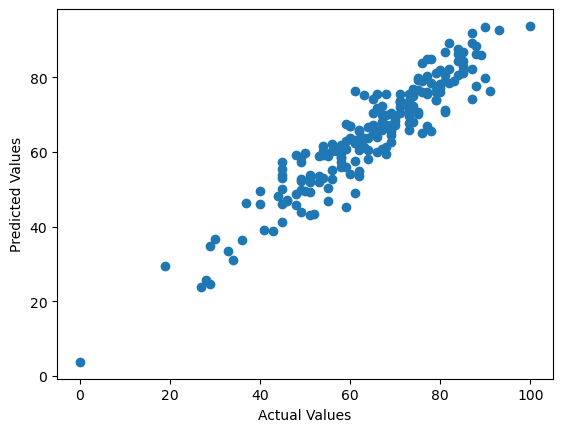

In [65]:
plt.scatter(x=Y_test,y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<IPython.core.display.Javascript object>

<Axes: xlabel='math score'>

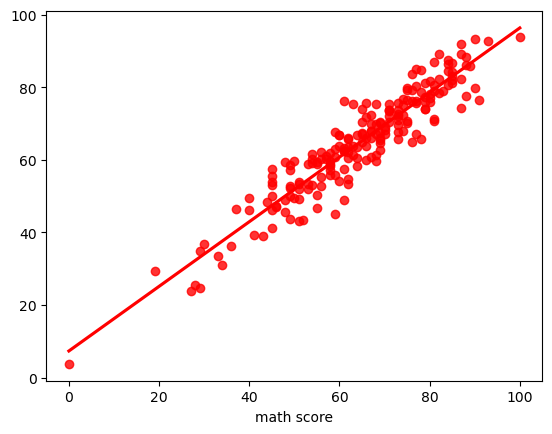

In [71]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values

In [79]:
values = pd.DataFrame({'Actual Value':Y_test,'Predicted  Value':y_pred,'Difference':Y_test-y_pred})

In [80]:
values.head()

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
